## <span style="color:blue">Introduction to computation in physical sciences</span>
### J Wang and A Wang, [github.com/com-py/intro](https://github.com/com-py/intro) 
### Ch07, `p1-relativity-widget`, Relativity

In [1]:
import numpy as np, matplotlib.pyplot as plt
import matplotlib.animation as am
from matplotlib.widgets import Slider
%matplotlib notebook

In [2]:
def updatefig(*args):                   # args[0] = time counter
    n = args[0]
    if n < len(x):
        xn = x[n-1]
        w = 0.1/gamma                                   # contracted width
        boxx = [xn - w, xn - w, xn + w, xn + w]         # car
        boxy = [0, .1, .1, 0]
        plot[0].set_data(x[:n], y[:n])                  # lab
        plot[1].set_data([xn, xn], [y[n-10],y[n-1]])    # light beam
        plot[2].set_data(boxx, boxy)                    
        labtxt.set_position((.9*L, .8))                 # time update
        labtxt.set_text(r'$\beta$='+repr(slider.val)[:4]    # 4 digits
                        + '\n' + repr(tlab[n])[:4])
        cartxt.set_position((xn-0.2*w, .12))
        cartxt.set_text(repr(tcar[n])[:4])
    
def animate(dummy):
    global x, y, tlab, tcar, L, gamma, labtxt, ani
        
    beta = slider.val
    gamma = 1./np.sqrt((1-beta)*(1+beta))
    y = 1 - np.abs(np.linspace(-1,1,201))   # up/down parts
    L = beta*gamma                          # half way point
    x = np.linspace(0, 2*L, len(y))         # grid
    tcar = np.linspace(0, 2, len(y))        # proper time (train)
    tlab = gamma*tcar                       # time dilation (lab)    
    ax.set_xlim(-.05, max(.2,2.1*L)), ax.set_ylim(0,1)
    labtxt = ax.text(.9*L,.8, '', color='blue')     # lab time, new each run
    ani = am.FuncAnimation(fig, updatefig, interval=1)

<IPython.core.display.Javascript object>


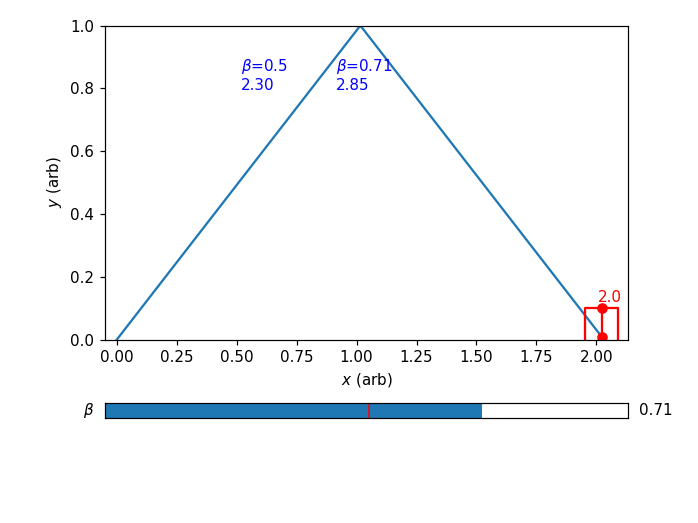

In [3]:
%matplotlib notebook
fig = plt.figure()
fig.canvas.set_window_title('Time dilation')
fig.subplots_adjust(left=0.15, bottom=0.35, top=.95)    # setup for slider
ax, z = fig.add_subplot(111), [0]
plot = ax.plot(z, z, '-', z, z, '-or', z, z, '-r')      # 3 curves
ax.set_xlabel('$x$ (arb)'), ax.set_ylabel('$y$ (arb)')
cartxt = ax.text(.2, .2, '', color='red')               # train time

axes = fig.add_axes([.15, .20, .75, .03])               # beta slider
slider = Slider(axes, r'$\beta$', 0, .99, .5)           # range, init val
slider.on_changed(animate)      # link slider to animate 
animate(None)
plt.show()